In [240]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Input the data and do descriptive analysis.

In [241]:
input_data_path="bank.csv"
data=pd.read_csv(input_data_path,sep=';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [242]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Count 'unknown' values for every feature. 

In [252]:
bin_attrs=['y','default','housing','loan']
numeric_attrs=['age','balance','day','duration','campaign','pdays','previous']
cate_attrs=['job','marital','education','contact','month','poutcome']

In [244]:
data.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [245]:
for i in data.columns:
    if type(data[i][0])is str:
        print("unknown value count in "+i+":\t"+str(data[data[i]=='unknown']['y'].count()))

unknown value count in job:	38
unknown value count in marital:	0
unknown value count in education:	187
unknown value count in default:	0
unknown value count in housing:	0
unknown value count in loan:	0
unknown value count in contact:	1324
unknown value count in month:	0
unknown value count in poutcome:	3705
unknown value count in y:	0


In [246]:
data = data[data['job']!= 'unknown']
data=data[data['education']!='unknown']
data.contact[data.contact=='unknown']=data.contact[data.contact!='unknown'].mode().values
data.poutcome[data.poutcome=='unknown']=data.poutcome[data.poutcome!='unknown'].mode().values

In [247]:
def encode_bin_attrs(data, bin_attrs):    
    for i in bin_attrs:
        data.loc[data[i] == 'no', i] = 0
        data.loc[data[i] == 'yes', i] = 1
    return data

In [248]:
def encode_edu_attrs(data):
    values = ["primary", "secondary", "tertiary"]
    levels = range(1,len(values)+1)
    dict_levels = dict(zip(values, levels))
    for v in values:
        data.loc[data['education'] == v,'education'] = dict_levels[v]
    return data

In [249]:
def encode_cate_attrs(data, cate_attrs):
    cate_attrs.remove('education')
    for i in cate_attrs:
        dummies_df = pd.get_dummies(data[i])
        dummies_df = dummies_df.rename(columns=lambda x: i+'_'+str(x))
        data = pd.concat([data,dummies_df],axis=1)
        data = data.drop(i, axis=1)
    return data

In [250]:
encode_bin_attrs(data,bin_attrs)
encode_edu_attrs(data)
encode_cate_attrs(data,cate_attrs)

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,30,1,0,1787,0,0,19,79,1,-1,...,0,0,0,0,0,1,0,1,0,0
1,33,2,0,4789,1,1,11,220,1,339,...,0,0,0,1,0,0,0,1,0,0
2,35,3,0,1350,1,0,16,185,1,330,...,0,0,0,0,0,0,0,1,0,0
3,30,3,0,1476,1,1,3,199,4,-1,...,0,1,0,0,0,0,0,1,0,0
4,59,2,0,0,1,0,5,226,1,-1,...,0,0,0,1,0,0,0,1,0,0
5,35,3,0,747,0,0,23,141,2,176,...,0,0,0,0,0,0,0,1,0,0
6,36,3,0,307,1,0,14,341,1,330,...,0,0,0,1,0,0,0,0,1,0
7,39,2,0,147,1,0,6,151,2,-1,...,0,0,0,1,0,0,0,1,0,0
8,41,3,0,221,1,0,14,57,2,-1,...,0,0,0,1,0,0,0,1,0,0
9,43,1,0,-88,1,1,17,313,1,147,...,0,0,0,0,0,0,0,1,0,0


Define plot_decision_regions function.

In [251]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [56]:
from sklearn.linear_model import Perceptron

def find_best_features(X_train, X_test, y_train, y_test):
    best_score = 0
    column_names = X_train.columns.values.tolist()
    c = dict(zip(range(X_train.columns.size),column_names))
    for ii in range(X_train.columns.size):
        for jj in range(X_train.columns.size):
            if jj > ii:
                ppn = Perceptron(max_iter=100, eta0=0.1, random_state=2333)
                ppn.fit(X_train[[c[ii],c[jj]]], y_train)
                y_pred = ppn.predict(X_test[[c[ii],c[jj]]])
                score = accuracy_score(y_test, y_pred)
                if score > best_score:
                    best_score = score
                    best_features = [c[ii],c[jj]]
                    idx1 = ii
                    idx2 = jj
    return [best_features, [idx1, idx2], best_score]

In [ ]:
output = find_best_features(X_train, X_test, y_train, y_test)
print(output)

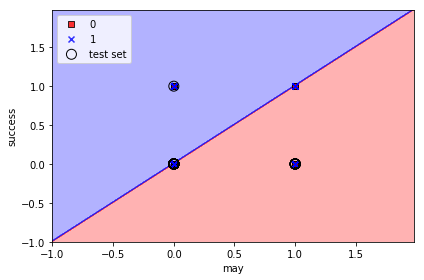

In [58]:
def plot_best_feature(output, X_train, X_test, y_train, y_test):
    ppn = Perceptron(max_iter=100, eta0=0.1, random_state=2333)
    ppn.fit(X_train[output[0]], y_train)
    
    X_combined = np.vstack((X_train[output[0]], X_test[output[0]]))
    y_combined = np.hstack((y_train, y_test))
    
    plot_decision_regions(X=X_combined, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
    plt.xlabel(output[0][0])
    plt.ylabel(output[0][1])
    plt.legend(loc='upper left')

    plt.tight_layout()
    #plt.savefig('images/ppn.png', dpi=300)
    plt.show()
    
plot_best_feature(output, X_train, X_test, y_train, y_test)

Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

def find_best_features(X_train, X_test, y_train, y_test):
    best_score = 0
    column_names = X_train.columns.values.tolist()
    c = dict(zip(range(X_train.columns.size),column_names))
    for ii in range(X_train.columns.size):
        for jj in range(X_train.columns.size):
            if jj > ii:
                lr = LogisticRegression(C=100, random_state=2333)
                lr.fit(X_train[[c[ii],c[jj]]], y_train)
                y_pred = lr.predict(X_test[[c[ii],c[jj]]])
                score = accuracy_score(y_test, y_pred)
                if score > best_score:
                    best_score = score
                    best_features = [c[ii],c[jj]]
                    idx1 = ii
                    idx2 = jj
    return [best_features, [idx1, idx2], best_score]

In [60]:
output = find_best_features(X_train, X_test, y_train, y_test)
print(output)

[['duration', 'success'], [6, 43], 0.899042004421518]


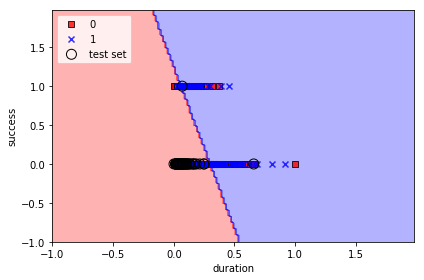

In [62]:
def plot_best_feature(output, X_train, X_test, y_train, y_test):
    lr = LogisticRegression(C=100, random_state=2333)
    lr.fit(X_train[output[0]], y_train)
    
    X_combined = np.vstack((X_train[output[0]], X_test[output[0]]))
    y_combined = np.hstack((y_train, y_test))
    
    plot_decision_regions(X=X_combined, y=y_combined,
                      classifier=lr, test_idx=range(105, 150))
    plt.xlabel(output[0][0])
    plt.ylabel(output[0][1])
    plt.legend(loc='upper left')

    plt.tight_layout()
    #plt.savefig('images/ppn.png', dpi=300)
    plt.show()
    
plot_best_feature(output, X_train, X_test, y_train, y_test)

SVM (kernal:linear)

In [65]:
from sklearn.svm import SVC

def find_best_features(X_train, X_test, y_train, y_test):
    best_score = 0
    column_names = X_train.columns.values.tolist()
    c = dict(zip(range(X_train.columns.size),column_names))
    for ii in range(X_train.columns.size):
        for jj in range(X_train.columns.size):
            if jj > ii:
                svm = SVC(kernel='linear', C=5.0, random_state=2333)
                svm.fit(X_train[[c[ii],c[jj]]], y_train)
                y_pred = svm.predict(X_test[[c[ii],c[jj]]])
                score = accuracy_score(y_test, y_pred)
                if score > best_score:
                    best_score = score
                    best_features = [c[ii],c[jj]]
                    idx1 = ii
                    idx2 = jj
    return [best_features, [idx1, idx2], best_score]

In [66]:
output = find_best_features(X_train, X_test, y_train, y_test)
print(output)

[['age', 'success'], [0, 43], 0.8953574060427414]


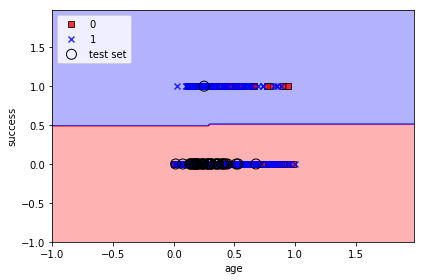

In [67]:
def plot_best_feature(output, X_train, X_test, y_train, y_test):
    svm = SVC(kernel='linear', C=5.0, random_state=2333)
    svm.fit(X_train[output[0]], y_train)
    
    X_combined = np.vstack((X_train[output[0]], X_test[output[0]]))
    y_combined = np.hstack((y_train, y_test))
    
    plot_decision_regions(X=X_combined, y=y_combined,
                      classifier=svm, test_idx=range(105, 150))
    plt.xlabel(output[0][0])
    plt.ylabel(output[0][1])
    plt.legend(loc='upper left')

    plt.tight_layout()
    #plt.savefig('images/ppn.png', dpi=300)
    plt.show()

plot_best_feature(output, X_train, X_test, y_train, y_test)

SVM(kernal:rbf)

In [ ]:
from sklearn.svm import SVC

def find_best_features(X_train, X_test, y_train, y_test):
    best_score = 0
    column_names = X_train.columns.values.tolist()
    c = dict(zip(range(X_train.columns.size),column_names))
    for ii in range(X_train.columns.size):
        for jj in range(X_train.columns.size):
            if jj > ii:
                svm = SVC(kernel='rbf', random_state=2333, gamma=0.10, C=10.0)
                svm.fit(X_train[[c[ii],c[jj]]], y_train)
                y_pred = svm.predict(X_test[[c[ii],c[jj]]])
                score = accuracy_score(y_test, y_pred)
                if score > best_score:
                    best_score = score
                    best_features = [c[ii],c[jj]]
                    idx1 = ii
                    idx2 = jj
    return [best_features, [idx1, idx2], best_score]

In [ ]:
output = find_best_features(X_train, X_test, y_train, y_test)
print(output)

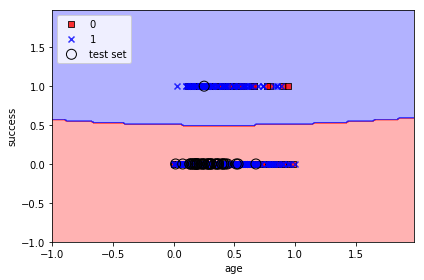

In [70]:
def plot_best_feature(output, X_train, X_test, y_train, y_test):
    svm = SVC(kernel='rbf', random_state=2333, gamma=0.10, C=10.0)
    svm.fit(X_train[output[0]], y_train)
    
    X_combined = np.vstack((X_train[output[0]], X_test[output[0]]))
    y_combined = np.hstack((y_train, y_test))
    
    plot_decision_regions(X=X_combined, y=y_combined,
                      classifier=svm, test_idx=range(105, 150))
    plt.xlabel(output[0][0])
    plt.ylabel(output[0][1])
    plt.legend(loc='upper left')

    plt.tight_layout()
    #plt.savefig('images/ppn.png', dpi=300)
    plt.show()

plot_best_feature(output, X_train, X_test, y_train, y_test)

Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

def find_best_features(X_train, X_test, y_train, y_test):
    best_score = 0
    column_names = X_train.columns.values.tolist()
    c = dict(zip(range(X_train.columns.size),column_names))
    for ii in range(X_train.columns.size):
        for jj in range(X_train.columns.size):
            if jj > ii:
                tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=2333)
                tree.fit(X_train[[c[ii],c[jj]]], y_train)
                y_pred = tree.predict(X_test[[c[ii],c[jj]]])
                score = accuracy_score(y_test, y_pred)
                if score > best_score:
                    best_score = score
                    best_features = [c[ii],c[jj]]
                    idx1 = ii
                    idx2 = jj
    return [best_features, [idx1, idx2], best_score]

In [72]:
output = find_best_features(X_train, X_test, y_train, y_test)
print(output)

[['duration', 'success'], [6, 43], 0.8968312453942521]


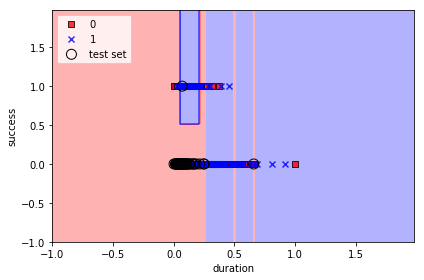

In [73]:
def plot_best_feature(output, X_train, X_test, y_train, y_test):
    tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=2333)
    tree.fit(X_train[output[0]], y_train)
    
    X_combined = np.vstack((X_train[output[0]], X_test[output[0]]))
    y_combined = np.hstack((y_train, y_test))
    
    plot_decision_regions(X=X_combined, y=y_combined,
                      classifier=tree, test_idx=range(105, 150))
    plt.xlabel(output[0][0])
    plt.ylabel(output[0][1])
    plt.legend(loc='upper left')

    plt.tight_layout()
    #plt.savefig('images/ppn.png', dpi=300)
    plt.show()
    
plot_best_feature(output, X_train, X_test, y_train, y_test)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def find_best_features(X_train, X_test, y_train, y_test):
    best_score = 0
    column_names = X_train.columns.values.tolist()
    c = dict(zip(range(X_train.columns.size),column_names))
    for ii in range(X_train.columns.size):
        for jj in range(X_train.columns.size):
            if jj > ii:
                forest = RandomForestClassifier(criterion='gini',
                                n_estimators=10, 
                                random_state=2333,
                                n_jobs=2)
                forest.fit(X_train[[c[ii],c[jj]]], y_train)
                y_pred = forest.predict(X_test[[c[ii],c[jj]]])
                score = accuracy_score(y_test, y_pred)
                if score > best_score:
                    best_score = score
                    best_features = [c[ii],c[jj]]
                    idx1 = ii
                    idx2 = jj
    return [best_features, [idx1, idx2], best_score]

In [75]:
output = find_best_features(X_train, X_test, y_train, y_test)
print(output)

[['may', 'success'], [37, 43], 0.8968312453942521]


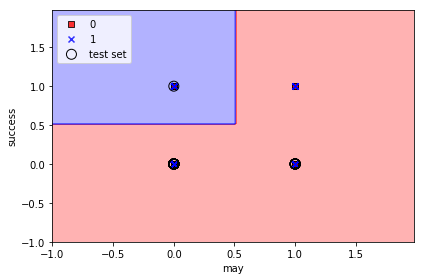

In [76]:
def plot_best_feature(output, X_train, X_test, y_train, y_test):
    forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
    forest.fit(X_train[output[0]], y_train)
    
    X_combined = np.vstack((X_train[output[0]], X_test[output[0]]))
    y_combined = np.hstack((y_train, y_test))
    
    plot_decision_regions(X=X_combined, y=y_combined,
                      classifier=forest, test_idx=range(105, 150))
    plt.xlabel(output[0][0])
    plt.ylabel(output[0][1])
    plt.legend(loc='upper left')

    plt.tight_layout()
    #plt.savefig('images/ppn.png', dpi=300)
    plt.show()
    
plot_best_feature(output, X_train, X_test, y_train, y_test)

KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier

def find_best_features(X_train, X_test, y_train, y_test):
    best_score = 0
    column_names = X_train.columns.values.tolist()
    c = dict(zip(range(X_train.columns.size),column_names))
    for ii in range(X_train.columns.size):
        for jj in range(X_train.columns.size):
            if jj > ii:
                knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
                knn.fit(X_train[[c[ii],c[jj]]], y_train)
                y_pred = knn.predict(X_test[[c[ii],c[jj]]])
                score = accuracy_score(y_test, y_pred)
                if score > best_score:
                    best_score = score
                    best_features = [c[ii],c[jj]]
                    idx1 = ii
                    idx2 = jj
    return [best_features, [idx1, idx2], best_score]

In [78]:
output = find_best_features(X_train, X_test, y_train, y_test)
print(output)

[['technician', 'success'], [22, 43], 0.8968312453942521]


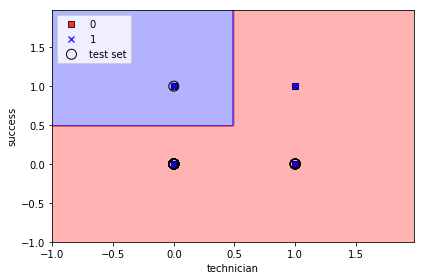

In [79]:
def plot_best_feature(output, X_train, X_test, y_train, y_test):
    knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
    knn.fit(X_train[output[0]], y_train)
    
    X_combined = np.vstack((X_train[output[0]], X_test[output[0]]))
    y_combined = np.hstack((y_train, y_test))
    
    plot_decision_regions(X=X_combined, y=y_combined,
                      classifier=knn, test_idx=range(105, 150))
    plt.xlabel(output[0][0])
    plt.ylabel(output[0][1])
    plt.legend(loc='upper left')

    plt.tight_layout()
    #plt.savefig('images/ppn.png', dpi=300)
    plt.show()
    
plot_best_feature(output, X_train, X_test, y_train, y_test)